# Lab 1 - Building dictionary with Selma Lagerlöf novels

Laboration 1 in EDAN20 @ LTH - http://cs.lth.se/edan20/coursework/assignment-1/

Author: Jonatan Kronander - elt15jkr@student.lu.se

### The objectives of this assignment are to:

-Write a program that collects all the words from a set of documents

-Build an index from the words

-Know what indexing is

-Represent a document using the Tf.Idf value

-Write a short report of 1 to 2 pages on the assignment

-Read a short text on an industrial system

## Indexing one file

* The index file will contain all the unique words in the document, where each word is associated with the list of its positions in the document.

* You will represent this index as a dictionary where the keys will be the words and the values, the lists of positions

* As words, you will consider all the strings of letters that you will set in lower case. You will not index the rest (i.e. numbers or symbols).

* To extract the words, you will use Unicode regular expressions. Do not use \w+, for instance, but the Unicode equivalent. The word positions will correspond to the number of characters from the beginning of the file. (The word offset from the beginning)

* You will use finditer() to find the positions of the words. This will return you match objects, where you will get the matches and the positions with the group() and start() methods.

In [1]:
text = open("Selma/bannlyst.txt").read()  

In [2]:
import regex as re

def toLowercase(matchobj):
    """
    Helper function
    """
    return matchobj.group(1).lower()

def textLowerList(text):
    """
    Make text lowercase and put into list
    
    :param string:
    :return list:
    """
    
    textLow = re.sub(r'([A-ZÅÄÖ])', toLowercase, text) # Lowercase all characters
    
    stringList = re.findall(r"[a-zåäö]+",textLow) # This finds all words from a txt file. r"[a-zåäö]+ equal to r"\w+" 
    
    return stringList

In [3]:
def toLowercase(matchobj):
    return matchobj.group(1).lower()

def string2dict(text):
    """
    Creates a dict with (word:list[index apperences]) from input string
    
    Input string, string
    Output dict
    """
    textLow = re.sub(r'([A-ZÅÄÖ])', toLowercase, text) # Lowercase all characters
    
    stringList = textLowerList(text)
    
    stringDict = {key : list([]) for key in stringList}
    
    for m in re.finditer(r"[a-zåäö]+", textLow): # Iterate thorugh every word
        s = m.start()
        e = m.end()
        
        word = textLow[s:e]
        stringDict[word].append(s)

    
    return stringDict

In [4]:
txtDict = string2dict(text) 

In [5]:
len(txtDict)

7924

#### Test with bannlyst text
The word gjord occurs three times in the text at positions 8551, 183692, and 220875, uppklarnande, once at position 8567, and stjärnor, once at position 8590. 

In [6]:
txtDict['gjord']

[8551, 183692, 220875]

In [7]:
txtDict['uppklarnande']

[8567]

In [8]:
txtDict['stjärnor']

[8590]

#### Pickle

* You will use the pickle package to write your dictionary in an file, see https://wiki.python.org/moin/UsingPickle.

In [9]:
import pickle

#with open('BannlystTxtDict.pickle', 'wb') as handle:
#    pickle.dump(txtDict, handle, protocol=pickle.HIGHEST_PROTOCOL)

Open pickle

In [10]:
with open('BannlystTxtDict.pickle', 'rb') as handle:
    BannlystTxtDict = pickle.load(handle)

#### Test of pickle

In [11]:
BannlystTxtDict == txtDict

True

## Reading the content of a folder

Write a function that reads all the files in a folder with a specific suffix (txt). You will need the Python os package, see https://docs.python.org/3/library/os.html. You will return the file names in a list.

Use function:

In [12]:
import os

def get_files(fileDir, suffix):
    """
    Returns all the files in a folder ending with suffix
    :param filedir:
    :param suffix:
    :return: the list of file names
    """
    files = []
    for file in os.listdir(fileDir):
        if file.endswith(suffix):
            files.append(file)
    return files

In [13]:
files = get_files("selma", ".txt")

In [14]:
files

['troll.txt',
 'kejsaren.txt',
 'marbacka.txt',
 'herrgard.txt',
 'nils.txt',
 'osynliga.txt',
 'jerusalem.txt',
 'bannlyst.txt',
 'gosta.txt']

## Creating a master index

Complete your program with the creation of master index, where you will associate each word of the corpus with the files, where it occur and its positions. (a posting list)

In [15]:
def toLowercase(matchobj):
    return matchobj.group(1).lower()
    
def addAll(fileDir,files): 
    """
    This function takes way to long. Do not iterate word in dict but build dict directly. 
    
    Reads all files in list and matches to txt files
    :param dir:
    :param files:
    :return dict:
    """
    
    totText = []
    
    for file in files:
        text = open(fileDir+"/"+file).read() 
        stringList = textLowerList(text)
        totText.extend(stringList)
        
    masterDict = {word : {file : list([]) for file in files} for word in totText}
    
    for file in files:
        text = open(fileDir+"/"+file).read()
        txtDict = string2dict(text)         
        for word in txtDict.keys():
            masterDict[word][file] = txtDict[word]

    return masterDict

In [16]:
masterDict = addAll('selma',files)

In [17]:
#with open('masterDict.pickle', 'wb') as handle:
#    pickle.dump(masterDict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [18]:
with open('masterDict.pickle', 'rb') as handle:
    masterDict = pickle.load(handle)

#### Test of master dict. Below is an except of the master index with the words samlar and ände:

'samlar': {'nils.txt': [53499, 120336], 'gosta.txt': [317119, 414300, 543686],'osynliga.txt': [410995, 871322]},

In [19]:
masterDict["samlar"]

{'troll.txt': [],
 'kejsaren.txt': [],
 'marbacka.txt': [],
 'herrgard.txt': [],
 'nils.txt': [53499, 120336],
 'osynliga.txt': [410995, 871322],
 'jerusalem.txt': [],
 'bannlyst.txt': [],
 'gosta.txt': [317119, 414300, 543686]}

'ände':{'nils.txt': [3991],'kejsaren.txt': [51100],'marbacka.txt': [374231],'troll.txt': [39726],'osynliga.txt': [742747]},

In [20]:
masterDict["ände"]

{'troll.txt': [39726],
 'kejsaren.txt': [51100],
 'marbacka.txt': [374231],
 'herrgard.txt': [],
 'nils.txt': [3991],
 'osynliga.txt': [742747],
 'jerusalem.txt': [],
 'bannlyst.txt': [],
 'gosta.txt': []}

## Representing Documents with tf-idf

Once you have created the index, you will represent each document in your corpus as a word vector. You will define the value of a word in a document with the tf-idf metric. Tf will be the relative frequency of the term in the document and idf, the logarithm base 10 of the inverse document frequency.

In [21]:
import math

def tiIdf(masterDict):
    """
    This function takes way to long. Do not iterate word in dict but build dict directly. 
    
    Creates a ft-idf dict from all files.
    https://www.freecodecamp.org/news/how-to-process-textual-data-using-tf-idf-in-python-cd2bbc0a94a3/
    :Param dict:
    :return dict:
    """
    
    tfIdfDict = masterDict.copy()
    j = 0
    
    lenText = {}
    for file in masterDict['nils']: # Read total nbr of words in each text
        text = open('selma'+"/"+file).read()
        lenText[file] = len(textLowerList(text)) # nbr of words in textfile
        
    for word in masterDict: 
        #idf will be the logarithm base 10 of the inverse document frequency.
        nbrKeys = len(masterDict[word].keys())
        dictValues = masterDict[word].values()
        lenDictValues = len(dictValues)
        
        i = 0 
        for fileList in dictValues: # Count nbr of empty list. (There is probably a better way to do this)
            if not fileList:
                i = i + 1

        df = (lenDictValues-i)
        
        idf = math.log10(nbrKeys/df)
        
        for file in masterDict[word]:
            # Tf will be the relative frequency of the term in the document 
            lenWordVec = len(masterDict[word][file]) # nbr of occurencies of word

            tf =  lenWordVec / lenText[file]   
            tfIdfDict[word][file] = tf*idf
        
    return tfIdfDict   

In [22]:
tfIdfDict = tiIdf(masterDict)

In [23]:
#with open('tfIdfDict.pickle', 'wb') as handle:
#    pickle.dump(tfIdfDict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [24]:
with open('tfIdfDict.pickle', 'rb') as handle:
    tfIdfDict = pickle.load(handle)

#### Test of tf idf:

känna :: bannlyst.txt 0.0, gosta.txt 0.0, herrgard.txt 0.0, jerusalem.txt 0.0, nils.txt 0.0

In [25]:
tfIdfDict['känna']

{'troll.txt': 0.0,
 'kejsaren.txt': 0.0,
 'marbacka.txt': 0.0,
 'herrgard.txt': 0.0,
 'nils.txt': 0.0,
 'osynliga.txt': 0.0,
 'jerusalem.txt': 0.0,
 'bannlyst.txt': 0.0,
 'gosta.txt': 0.0}

gås :: bannlyst.txt 0.0, gosta.txt 0.0, herrgard.txt 0.0, jerusalem.txt 0.0, nils.txt 0.00010123719421964931

In [26]:
tfIdfDict['gås']

{'troll.txt': 0.0,
 'kejsaren.txt': 0.0,
 'marbacka.txt': 0.0,
 'herrgard.txt': 0.0,
 'nils.txt': 0.00010122798897871197,
 'osynliga.txt': 0.0,
 'jerusalem.txt': 0.0,
 'bannlyst.txt': 0.0,
 'gosta.txt': 0.0}

nils :: bannlyst.txt 0.0, gosta.txt 0.0, herrgard.txt 0.0 jerusalem.txt 4.778415355159037e-06, nils.txt 9.801209641132888e-05

In [27]:
tfIdfDict['nils']

{'troll.txt': 3.6573040073255117e-06,
 'kejsaren.txt': 8.084895961972068e-06,
 'marbacka.txt': 7.587798323647353e-06,
 'herrgard.txt': 0.0,
 'nils.txt': 9.800318442034381e-05,
 'osynliga.txt': 0.0,
 'jerusalem.txt': 4.7779383543374685e-06,
 'bannlyst.txt': 0.0,
 'gosta.txt': 0.0}

et :: bannlyst.txt 6.2846093167673765e-06, gosta.txt 0.0, herrgard.txt 0.0, jerusalem.txt 0.0, nils.txt 0.0

In [28]:
tfIdfDict['et']

{'troll.txt': 0.0,
 'kejsaren.txt': 6.044482862097453e-05,
 'marbacka.txt': 1.4182098676366573e-05,
 'herrgard.txt': 0.0,
 'nils.txt': 0.0,
 'osynliga.txt': 0.0,
 'jerusalem.txt': 0.0,
 'bannlyst.txt': 6.284526537403352e-06,
 'gosta.txt': 0.0}

## Comparing Documents

Using the cosine similarity, compare all the pairs of documents with their tfidf representation and present your results in a matrix. You will include this matrix in your report.

Give the name of the two novels that are the most similar.

There are the document representations in term of words. Rows: documents, Col: words.

In [29]:
import numpy as np

docMatrix = np.zeros((9,len(tfIdfDict.keys())))
wordList = tfIdfDict.keys()
fileList = tfIdfDict['nils']

for i, word in enumerate(wordList):
    for j, file in enumerate(fileList):
        docMatrix[j,i] = tfIdfDict[word][file]


In [30]:
import numpy as np; import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

df = pd.DataFrame(docMatrix)

simularityMatrix = cosine_similarity(df)

print()

index = simularityMatrix[:,:].flatten().argsort()[-10:][::-1][9] # This is the 

print("Position: (", index//9, ",", index, ") has maximum val")

print("That correspond to text:", list(fileList.keys())[index//9], "and", list(fileList.keys())[index], "Hence they are most similar with cosine value:", simularityMatrix[0,1])


Position: ( 0 , 1 ) has maximum val
That correspond to text: troll.txt and kejsaren.txt Hence they are most similar with cosine value: 0.0883242211534


Plot matrix

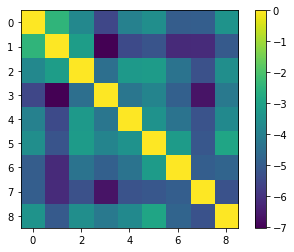

0 = troll.txt
1 = kejsaren.txt
2 = marbacka.txt
3 = herrgard.txt
4 = nils.txt
5 = osynliga.txt
6 = jerusalem.txt
7 = bannlyst.txt
8 = gosta.txt


In [32]:
import matplotlib.pyplot as plt

plt.imshow(np.log(simularityMatrix))
plt.colorbar()
plt.show()

for i,file in enumerate(list(fileList.keys())):
    print(i, "=", file)

In [33]:
print("TEXT 1", "TEXT 2", "Simularity Value")
for i,iFile in enumerate(list(fileList.keys())):
    for j, jFile in enumerate(list(fileList.keys())):
        print(iFile, jFile, simularityMatrix[i,j])

TEXT 1 TEXT 2 Simularity Value
troll.txt troll.txt 1.0
troll.txt kejsaren.txt 0.0883242211534
troll.txt marbacka.txt 0.0236866510836
troll.txt herrgard.txt 0.00398547315992
troll.txt nils.txt 0.0193837084392
troll.txt osynliga.txt 0.0282769699387
troll.txt jerusalem.txt 0.00707951128926
troll.txt bannlyst.txt 0.0073414645024
troll.txt gosta.txt 0.0324358645237
kejsaren.txt troll.txt 0.0883242211534
kejsaren.txt kejsaren.txt 1.0
kejsaren.txt marbacka.txt 0.0445954870002
kejsaren.txt herrgard.txt 0.000891615732519
kejsaren.txt nils.txt 0.00437266259504
kejsaren.txt osynliga.txt 0.00552744271082
kejsaren.txt jerusalem.txt 0.0020577102754
kejsaren.txt bannlyst.txt 0.00214438176036
kejsaren.txt gosta.txt 0.00649576796948
marbacka.txt troll.txt 0.0236866510836
marbacka.txt kejsaren.txt 0.0445954870002
marbacka.txt marbacka.txt 1.0
marbacka.txt herrgard.txt 0.0117053763102
marbacka.txt nils.txt 0.0402253390059
marbacka.txt osynliga.txt 0.0421493424997
marbacka.txt jerusalem.txt 0.012911484463

## Reading

Read the text: Challenges in Building Large-Scale Information Retrieval Systems about the history of Google indexing by Jeff Dean. In your report, tell how your index encoding is related to what Google did. You must identify the slide where you have the most similar indexing technique and write the slide number in your report. https://static.googleusercontent.com/media/research.google.com/en//people/jeff/WSDM09-keynote.pdf

#### Answer:

On slide 14-17 they talk about ways of index partitioning and compare by doing so with doc or by word. Google and we have similar problem where we want to index shards partitioning from a set of documents. Google uses docs as index while we used word, where we had shard subset of words for all docs.